In [49]:
from PIL import Image
import pytesseract

In [50]:
pytesseract.__version__

'0.3.10'

In [51]:
tesseractPos = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
imagePos = r'E:\GithubProjects\HIDDEN\ImageFromVideo\tests\stitchedImage.png'
imagePos2 = r'E:\GithubProjects\HIDDEN\ImageFromVideo\tests\frame.png'

pytesseract.pytesseract.tesseract_cmd = tesseractPos

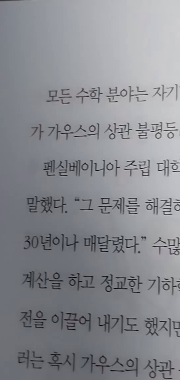

In [52]:
Image.open(imagePos2)

In [53]:
result = pytesseract.image_to_string(Image.open(imagePos2),
                        			 config='-l kor --oem 3 --psm 6')
result

'튼 수학 분야는 자기\n유스의 상관 불평등\n"\' 이니아 주립 대\n문게를 해실=\n\n해  다? 수많\n\n한 기히\n'

Bounding box

In [30]:
import cv2 as cv

In [31]:
dst = cv.imread(imagePos2)
mser = cv.MSER_create()
regions, _ = mser.detectRegions(cv.cvtColor(dst, cv.COLOR_BGR2GRAY))

hulls = [cv.convexHull(p.reshape(-1, 1, 2)) for p in regions]

for j, cnt in enumerate(hulls):
    x, y, w, h = cv.boundingRect(cnt)

    # if w > 160:
    #     continue

    cv.rectangle(dst, (x, y), (x + w, y + h), (0, 255, 0), 1)

cv.imshow('receipt_output.jpg', dst)
cv.waitKey(0)
cv.destroyAllWindows()

https://yunwoong.tistory.com/73?category=902345

In [32]:
import matplotlib.pyplot as plt
import numpy as np

In [33]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv.cvtColor(img[i], cv.COLOR_GRAY2RGB)
            else:
                rgbImg = cv.cvtColor(img[i], cv.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv.cvtColor(img, cv.COLOR_GRAY2RGB)
        else:
            rgbImg = cv.cvtColor(img, cv.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

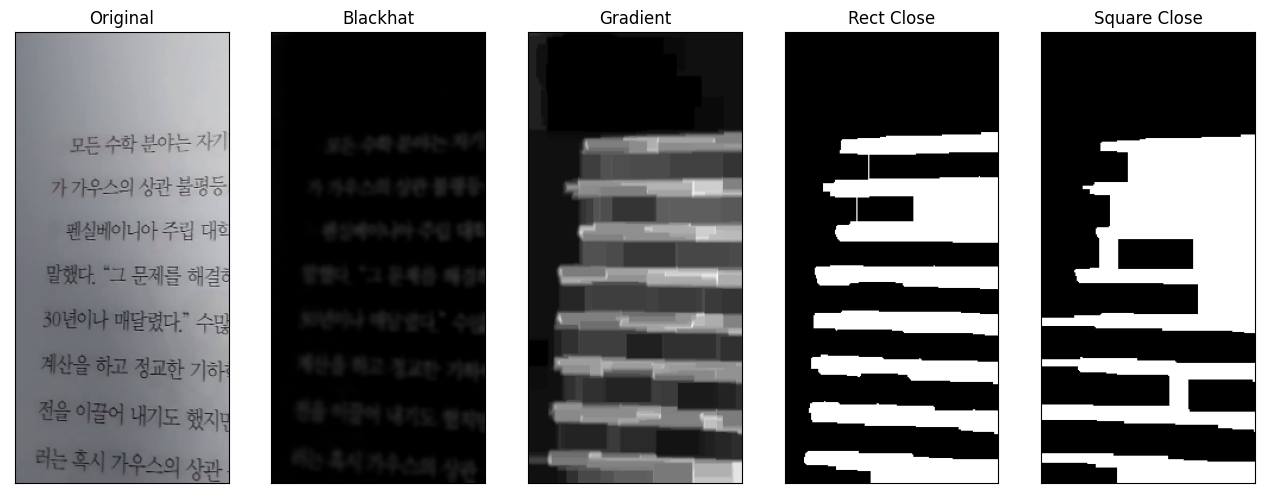

In [34]:
targetImage = cv.imread(imagePos2)
gray = cv.cvtColor(targetImage, cv.COLOR_BGR2GRAY)
(H, W) = gray.shape
 
rectKernel = cv.getStructuringElement(cv.MORPH_RECT, (30, 20))
sqKernel = cv.getStructuringElement(cv.MORPH_RECT, (50, 21))
 
gray = cv.GaussianBlur(gray, (11, 11), 0)
blackhat = cv.morphologyEx(gray, cv.MORPH_BLACKHAT, rectKernel)
 
grad = cv.Sobel(blackhat, ddepth=cv.CV_32F, dx=1, dy=0, ksize=-1)
grad = np.absolute(grad)
(minVal, maxVal) = (np.min(grad), np.max(grad))
grad = (grad - minVal) / (maxVal - minVal)
grad = (grad * 255).astype("uint8")
 
grad = cv.morphologyEx(grad, cv.MORPH_CLOSE, rectKernel)
thresh = cv.threshold(grad, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)[1]
 
close_thresh = cv.morphologyEx(thresh, cv.MORPH_CLOSE, sqKernel)
close_thresh = cv.erode(close_thresh, None, iterations=2)
 
plt_imshow(["Original", "Blackhat", "Gradient", "Rect Close", "Square Close"], [targetImage, blackhat, grad, thresh, close_thresh], figsize=(16, 10))

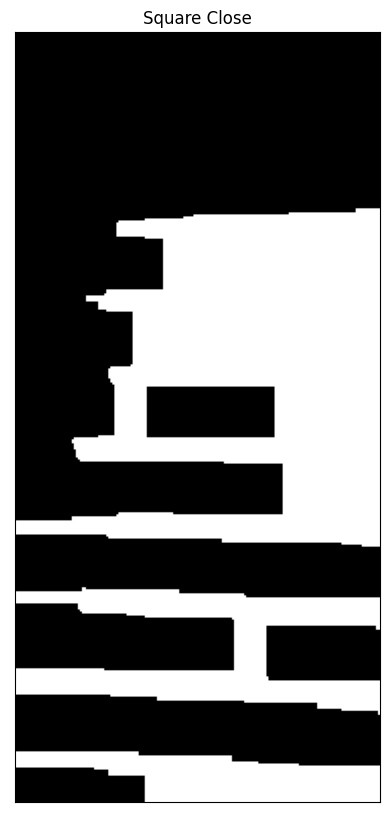

In [35]:
plt_imshow(["Square Close"], [close_thresh], figsize=(16, 10))

In [40]:
targetImage.shape

(380, 180, 3)

In [39]:
close_thresh.shape

(380, 180)

In [43]:
close_thresh = cv.cvtColor(close_thresh, cv.COLOR_GRAY2RGB)
close_thresh.shape

(380, 180, 3)

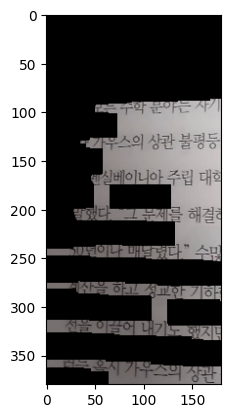

In [44]:
plt.imshow(close_thresh & targetImage)

In [45]:
thresh = cv.cvtColor(thresh, cv.COLOR_GRAY2RGB)
thresh.shape

(380, 180, 3)

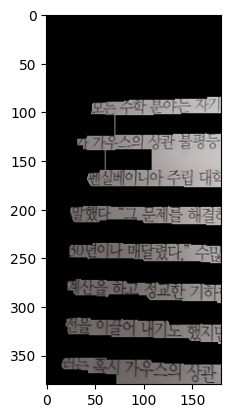

In [46]:
plt.imshow(thresh & targetImage)

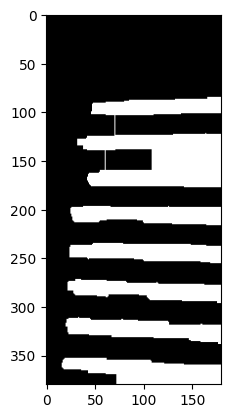

In [48]:
plt.imshow(thresh)

In [55]:
k = cv.getStructuringElement(cv.MORPH_RECT, (6,6))
thresh = cv.dilate(thresh, k)

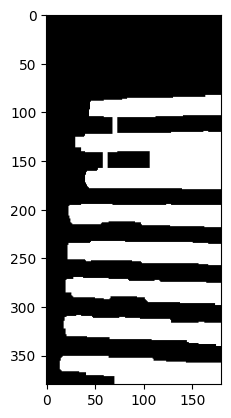

In [56]:
plt.imshow(thresh)

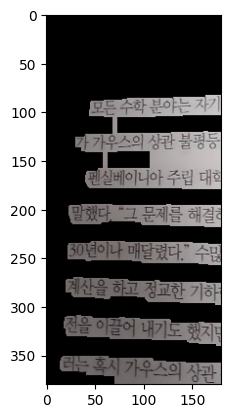

In [57]:
plt.imshow(thresh & targetImage)

# Bouding box 22

In [36]:
from imutils.perspective import four_point_transform
from imutils.contours import sort_contours
import imutils

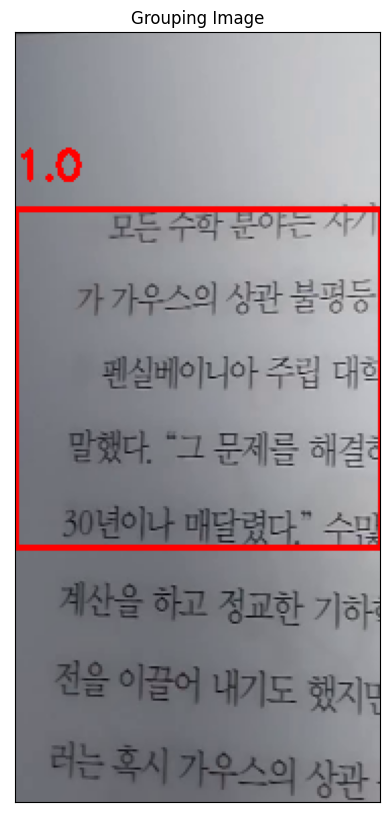

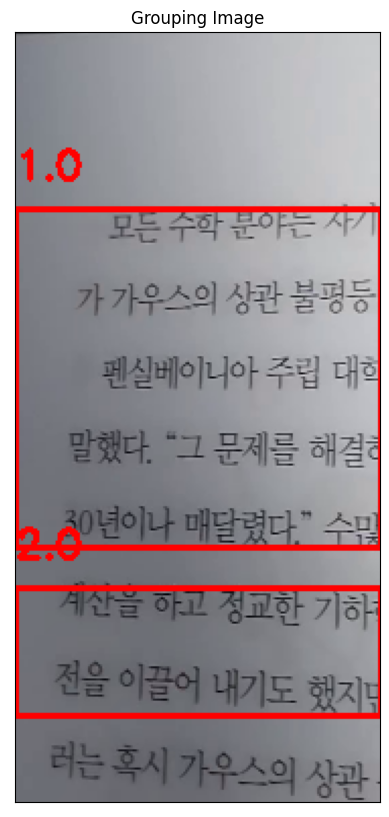

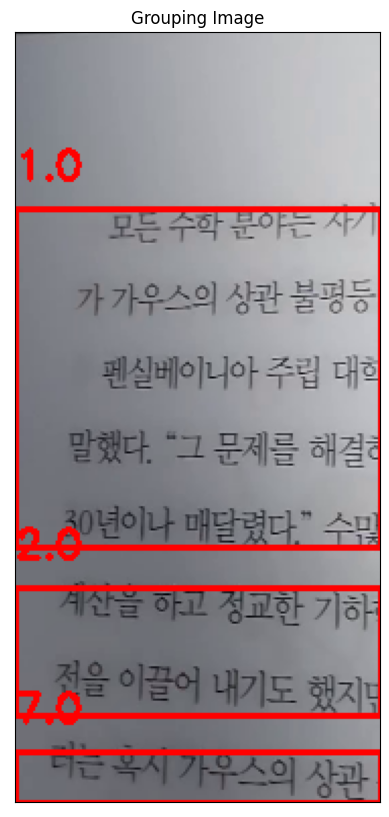

In [37]:
cnts = cv.findContours(close_thresh.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="top-to-bottom")[0]
 
roi_list = []
roi_title_list = []
 
margin = 0
receipt_grouping = targetImage.copy()
 
for c in cnts:
  (x, y, w, h) = cv.boundingRect(c)
  ar = w // float(h)
 
  if ar > 3.0 and ar < 6.5 and (W/2) < x:
    color = (0, 255, 0)
    roi = targetImage[y - margin:y + h + margin, x - margin:x + w + margin]
    roi_list.append(roi)
    roi_title_list.append("Roi_{}".format(len(roi_list)))
  else:
    color = (0, 0, 255)
 
  cv.rectangle(receipt_grouping, (x - margin, y - margin), (x + w + margin, y + h + margin), color, 2)
  cv.putText(receipt_grouping, "".join(str(ar)), (x, y - 15), cv.FONT_HERSHEY_SIMPLEX, 0.65, color, 2)
  
  plt_imshow(["Grouping Image"], [receipt_grouping], figsize=(16, 10))

In [38]:
plt_imshow(roi_title_list, roi_list, figsize=(16, 10))
 
for roi in roi_list:
  gray_roi= cv.cvtColor(roi, cv.COLOR_BGR2GRAY)
  threshold_roi = cv.threshold(gray_roi, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)[1]
  roi_text = pytesseract.image_to_string(threshold_roi)
  print(roi_text)

<Figure size 1600x1000 with 0 Axes>

https://yunwoong.tistory.com/75?category=902345